# Regularized Ridge Regression on The Compressive Strength of Concrete Mixures of Varying Composition

## DAT 402 Project 1
### Author - __Thomas Derr__
#### Dataset - https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking

## Import Needed Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

## Import and Clean Data

### Nature of the Data
The recorded data is comprised of the data gathered by testing the compressive strength of concrete mixures comprised of cement, slag, ash, water, super plasticizer, coarse aggregate, and fine aggregate. 425 of these 1030 measurements were made on 28 day old concrete. Each of these components were measured in kg per $m^3$ of wet mixture, and total compressibe strengt was measured in MegaPascals (MPa)

In [2]:
df = pd.read_csv('Concrete Compressive Strength.csv') #import data
df = df.loc[df['Age (day)'] == 28] # Remove measurments not taken at 28 days
df = df.drop(columns = ['Age (day)']) #Age no longer needed
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,61.887366
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,39.289790


### Separate Training and Testing Data

In [3]:
X = df.iloc[:,:-1] #input
y = df.iloc[:,-1] #target

#Scaling X
StandardScaler().fit_transform(X)

#Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3) #split into x and y test/train sets

# __Ridge Regression__ 

### (My Goal with this was to accomplish everything that had been done in the ridge regression lecture in python instead of R)


## The Math

### Ordinary Least Squares 

Minimize - $f(\beta) = \sum_{i=1}^n (y_i - \beta_0 = \sum_{j=1}^P \beta_jx_{ij})^2 = ||y-X\beta||^2$

### Ridge Regresion 

Minimize - $\sum_{i=1}^n (y_i - \beta_0 = \sum_{j=1}^P \beta_jx_{ij})^2 + \lambda \sum_{j=1}^P \beta_j^2= f(\beta) + \lambda g(\beta)$

$g(\beta)$ is sum of squares of $\beta_j$'s $j = 1...P$

$\lambda$ controls the values of our $B_j$'s, if $\lambda$ is large our model will be simpler, and if it is smaller the model will be more complex

## Linear Regreession (Zero Penalty Ridge Regression)

In [4]:
model1 = linear_model.LinearRegression()
model1.fit(Xtrain, ytrain)
yhattest1 = model1.predict(Xtest)
rmse1 = np.sqrt(mean_squared_error(ytest, yhattest1))

## Full Penalty Untuned Lambda ($\lambda = 1$)

In [5]:
model2 = Ridge(alpha = 1)
model2.fit(Xtrain, ytrain)
yhattest2 = model2.predict(Xtest)

rmse2 = np.sqrt(mean_squared_error(ytest, yhattest2))

## Finding Ideal Lambda

### Building Initial Ridge Model

In [6]:
model3 = Ridge()
lambdavec = 10 ** np.linspace(10,-2, 1000) 

coefs = []
for a in lambdavec:
    model3.set_params(alpha = a)
    model3.fit(Xtrain,ytrain)
    coefs.append(model3.coef_)

yhattest3 = model3.predict(Xtest)
rmse3 = np.sqrt(mean_squared_error(ytest, yhattest3))

### Coefficients

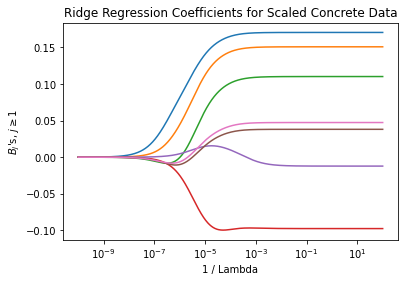

In [7]:
ax = plt.gca()
ax.plot((1 / lambdavec), coefs)
ax.set_xscale("log")
plt.xlabel("1 / Lambda")
plt.ylabel("$B_j$'s, $j \geq 1$")
plt.title("Ridge Regression Coefficients for Scaled Concrete Data")
plt.axis()
plt.show()

### Tuning Lambda

In [8]:
#10 fold Cross Validation allows us to sample alphas and find best value for Parameter
cv = RidgeCV(alphas = lambdavec, scoring = "neg_mean_squared_error", cv = 10, normalize = False)
cv.fit(Xtrain, ytrain)
model3tuned = Ridge(alpha = cv.alpha_)
model3tuned.fit(Xtrain,ytrain)  
yhattest3tuned = model3tuned.predict(Xtest)
rmse3tuned = np.sqrt(mean_squared_error(ytest, yhattest3tuned))

## Analysis

### Train RMSE Values For Each Model

In [13]:
rmseTrain1 = np.sqrt(mean_squared_error(ytrain, model1.predict(Xtrain)))
rmseTrain2 = np.sqrt(mean_squared_error(ytrain, model2.predict(Xtrain)))
rmseTrain3 = np.sqrt(mean_squared_error(ytrain, model3.predict(Xtrain)))
rmseTrain3tuned= np.sqrt(mean_squared_error(ytrain, model3tuned.predict(Xtrain)))
 
labels = ['Linear Regression', 'Full Penalty Ridge', 'Initial Ridge','Tuned Ridge']
rmseTrain = [rmseTrain1,rmseTrain2,rmseTrain3,rmseTrain3tuned] 
df2 = pd.DataFrame(columns=[labels,rmseTrain])
df2

,Linear Regression,Full Penalty Ridge,Initial Ridge,Tuned Ridge
,6.973814,6.973814,6.973814,6.982877


### Test RMSE Values For Each Model

In [14]:
labels = ['Linear Regression', 'Full Penalty Ridge', 'Initial Ridge','Tuned Ridge']
rmseTest = [rmse1,rmse2,rmse3,rmse3tuned]
df3 = pd.DataFrame(columns=[labels,rmseTest])
df3

,Linear Regression,Full Penalty Ridge,Initial Ridge,Tuned Ridge
,7.306689,7.306678,7.306689,7.247287


### Mean Compressive Strength

In [15]:
avg = np.mean(df['Concrete compressive strength(MPa, megapascals) '])
avg

36.74848028408471

### Root Mean Square Error Percentage of Mean

In [12]:
df4 = pd.DataFrame(columns = [labels, (rmseTest / avg)]) * 100
df4

,Linear Regression,Full Penalty Ridge,Initial Ridge,Tuned Ridge
,0.198830,0.198829,0.198830,0.197213


### Conclusion

As can be seen with the test RMSE values of the different models, there is not significant improvement between the different models when predicting the compressive strengh of a mixture. Depending on the trial the Tuned Ridge Regression tends to outperform the other models marginally, but not always, and not by significant measure. All of the test RMSE's hover around 7.2-7.3 MPa, and the train RMSE's are at around 7.0 MPa. One thing I did notice was often even when the Train RMSE was higher for the Tuned Ridge Regression Model than the other three, the Test RMSE was still often lower than the others. This could point towards the model marginally outperforming the others. 